# Simulação de Filas com pesagem de caminhões

Baseado em 
1. https://towardsdatascience.com/introduction-to-simulation-with-simpy-322606d4ba0c
2. https://towardsdatascience.com/introduction-to-simulation-with-simpy-8d744c82dc80

In [ ]:
!pip install simpy
import simpy
import pandas as pd
import numpy  as np
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# listas de horários de chegada e saída das fila
chegadas, saidas = [],[]
# listas de horários de chegada e saída das filas
# Tempo que demora na fila, tempo que demora pagando
in_queue, in_system  = [],[]
# tempo na fila e tamanho das filas
horarios_nas_filas, tamanho_da_fila = [],[]

# Funções com simulações de cada momento

Funções auxiliares para guardar informações de tempo e tamanho das filas

In [ ]:
def salva_info_da_fila(env, compra):
    horario_pagamento = env.now
    tamanho_da_fila_agora = len(compra.queue)
    horarios_nas_filas.append(horario_pagamento)
    tamanho_da_fila.append(tamanho_da_fila_agora)

    return horario_pagamento

def distribuicao_chegada_de_users():
  tempo_do_proximo_user = expon.rvs(scale = CHEGADA_DE_USERS_POR_TEMPO, size = 1)
  return tempo_do_proximo_user

def calcula_tempo_no_sistema(env, horario_chegada):
  horario_saida = env.now
  saidas.append(horario_saida)
  tempo_total = horario_saida - horario_chegada
  in_system.append(tempo_total)

In [ ]:
from scipy.stats import expon

CHEGADA_DE_USERS_POR_TEMPO = 5
MEDIA_DO_TEMPO_DA_COMPRA_DO_INGRESSO = 20.0
DESVIO_PADRAO_DA_COMPRA_DO_INGRESSO = 0.5

# Função que define a chegada de users
# usando funcao de distribuicao de probabilidade,
# define a ordem e tempo de chegada dos users
def chegada_dos_users(env):
    # ID para cada user
    user_id = 0

    while True:
       ## tempo de chegada do proximo user
       tempo_do_proximo_user = distribuicao_chegada_de_users()
       # espera pelo próximo user
       yield env.timeout(tempo_do_proximo_user)

       # user chegou, marca o tempo e guarda o tempo de chegada
       tempo_de_chegada = env.now
       chegadas.append(tempo_de_chegada)
       user_id += 1
       print('%3d entrou no site em %.2f' % (user_id, tempo_de_chegada))
       
       # executa a compra
       env.process(compra(env, user_id, tempo_de_chegada))

# pega o tempo de compra do ingresso
def tempo_de_compra_do_ingresso():
  return norm.rvs(loc = MEDIA_DO_TEMPO_DA_COMPRA_DO_INGRESSO, 
                  scale = DESVIO_PADRAO_DA_COMPRA_DO_INGRESSO, 
                  size = 1)



# executa a compra do ingresso
def compra(env, user_id, horario_chegada):
    with entrar_no_site.request() as req:
        print('%3d entrou na fila em %.2f' % (user_id, env.now))
        horario_entrada_da_fila = salva_info_da_fila(env, entrar_no_site)
        yield req # espera o caixa ser liberado
        
        print('%3d saiu da fila em %.2f' % (user_id, env.now))
        horario_saida_da_fila = salva_info_da_fila(env, entrar_no_site)

        # tempo que ficou na fila
        tempo_na_fila = horario_saida_da_fila - horario_entrada_da_fila
        in_queue.append(tempo_na_fila)

        # Execução da compra do ingresso
        tempo_compra = tempo_de_compra_do_ingresso()
        yield env.timeout(tempo_compra)
        print('%3d permaneceu por %.2f' % (user_id, tempo_compra))

        # tempo total da operacao de compra + fila
        calcula_tempo_no_sistema(env, horario_chegada)

In [ ]:
# Simulação irá demorar 300 tempos
TEMPO_DE_SIMULACAO  = 300

# Seed fixo. Assim, será o mesmo valor todas as vezes que executarmos
## selecting a random seed for the probability distributions
## defining the truck arrival process
np.random.seed(seed = 1)

## prepara o ambiente
env = simpy.Environment()

## Definindo recursos: Quantidade de caixas disponíveis
QUANTIDADE_DE_CAIXAS_DISPONIVEIS = 1
entrar_no_site = simpy.Resource(env, capacity = QUANTIDADE_DE_CAIXAS_DISPONIVEIS)

env.process(chegada_dos_users(env))

# Roda a simulação
env.run(until = TEMPO_DE_SIMULACAO)

  1 entrou no site em 2.70
  1 entrou na fila em 2.70
  1 saiu da fila em 2.70
  2 entrou no site em 9.07
  2 entrou na fila em 9.07
  3 entrou no site em 11.60
  3 entrou na fila em 11.60
  4 entrou no site em 15.47
  4 entrou na fila em 15.47
  5 entrou no site em 18.18
  5 entrou na fila em 18.18
  1 permaneceu por 19.74
  2 saiu da fila em 22.43
  6 entrou no site em 23.96
  6 entrou na fila em 23.96
  7 entrou no site em 25.11
  7 entrou na fila em 25.11
  8 entrou no site em 35.63
  8 entrou na fila em 35.63
  9 entrou no site em 35.77
  9 entrou na fila em 35.77
 10 entrou no site em 41.32
 10 entrou na fila em 41.32
  2 permaneceu por 19.46
  3 saiu da fila em 41.90
 11 entrou no site em 44.02
 11 entrou na fila em 44.02
 12 entrou no site em 45.12
 12 entrou na fila em 45.12
 13 entrou no site em 53.19
 13 entrou na fila em 53.19
  3 permaneceu por 19.44
  4 saiu da fila em 61.34
 14 entrou no site em 70.44
 14 entrou na fila em 70.44
 15 entrou no site em 72.32
 15 entrou na 

# Análise dos Resultados

In [ ]:
df1 = pd.DataFrame(horarios_nas_filas, columns = ['horario'])
df2 = pd.DataFrame(tamanho_da_fila, columns = ['tamanho'])
df3 = pd.DataFrame(chegadas, columns = ['chegadas'])
df4 = pd.DataFrame(saidas, columns = ['partidas'])

df_tamanho_da_fila = pd.concat([df1, df2], axis = 1)
df_entrada_saida = pd.concat([df3, df4], axis = 1)


# Gráfico com as entradas e saídas de cada user


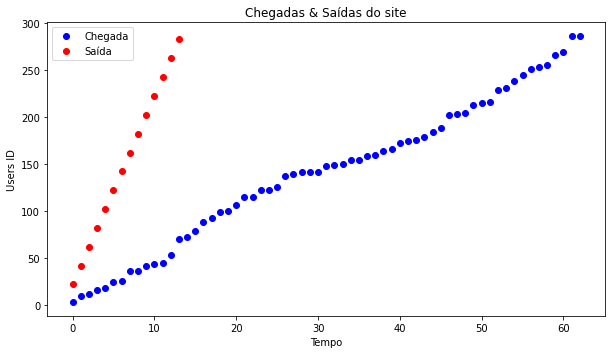

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 5.4)

x1, y1 = list(df_entrada_saida['chegadas'].keys()), df_entrada_saida['chegadas']
x2, y2 = list(df_entrada_saida['partidas'].keys()), df_entrada_saida['partidas']

ax.plot(x1, y1, color='blue', marker="o", linewidth=0, label="Chegada")
ax.plot(x2, y2, color='red', marker="o", linewidth=0, label="Saída")
ax.set_xlabel('Tempo')
ax.set_ylabel('Users ID')
ax.set_title("Chegadas & Saídas do site")
ax.legend()

# Gráfico com o tempo com o tamanho de tempo na fila

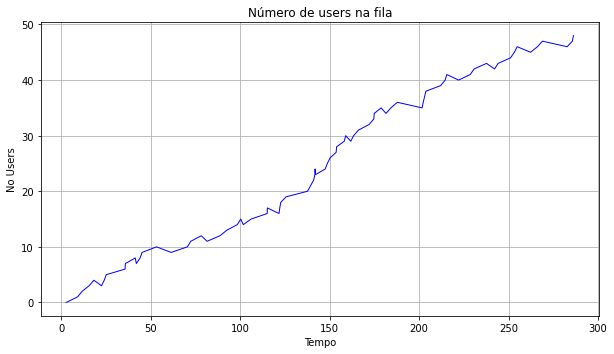

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 5.4)

ax.plot(df_tamanho_da_fila['horario'], df_tamanho_da_fila['tamanho'], color='blue', linewidth=1)
ax.set_xlabel('Tempo')
ax.set_ylabel('No Users')
ax.set_title('Número de users na fila')
ax.grid()

# Métricas Globais

In [ ]:
NUMERO_DE_DESISTENTES = 7

## finds the time average number of customers in the waiting line
## use the next row to figure out how long the queue was   
def media_fila(df_tamanho_fila):
  df_tamanho_fila['delta'] = df_tamanho_fila['horario'].shift(-1) - df_tamanho_fila['horario']
  ## drop the last row because it would have an infinite delta time 
  # remote a linha anteruir para não ter delta infinuto
  df_tamanho_fila = df_tamanho_fila[0:-1]
  return np.average(df_tamanho_fila['tamanho'], weights=df_tamanho_fila['delta'])

def utilizacao_servico(df_tamanho_fila):
   soma_servico_livre = df_tamanho_fila[df_tamanho_fila['tamanho']==0]['delta'].sum()
   # processo começa com o serviço vazio
   primeiro_evento =  df_tamanho_fila['horario'].iloc[0]
   soma_servico_livre = soma_servico_livre + primeiro_evento
   return round((1 - soma_servico_livre / TEMPO_DE_SIMULACAO) * 100, 2)

## Encontra a procentagem de users que não quiseram esperar
def porcetagem_de_nao_esperaram(df_tamanho_fila):
   soma_nao_esperaram = df_tamanho_fila[df_tamanho_fila['tamanho'] <= NUMERO_DE_DESISTENTES]['delta'].sum()
   return round((soma_nao_esperaram / TEMPO_DE_SIMULACAO) * 100, 2)


print('O tempo médio na fila é de %.2f'  % (np.mean(in_queue)))
print('O tempo médio no sistema é %.2f' % (np.mean(in_system)))

print('O número médio de usuários na fila é %.2f' %  (media_fila(df_tamanho_da_fila)))
print('A utilizacao do serviço é %.2f' % (utilizacao_servico(df_tamanho_da_fila)))

print('A probabilidade de usuários que desistem na fila é %.2f' % (porcetagem_de_nao_esperaram(df_tamanho_da_fila)))

O tempo médio na fila é de 108.36
O tempo médio no sistema é 121.07
O número médio de usuários na fila é 24.58
A utilizacao do serviço é 96.98
A probabilidade de usuários que desistem na fila é 13.58
